In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")
y2011 = pd.read_csv("2011.csv")
y2012Q1 = pd.read_csv("2012Q1.csv")
y2012Q2 = pd.read_csv("2012Q2.csv")
y2012Q3 = pd.read_csv("2012Q3.csv")
y2012Q4 = pd.read_csv("2012Q4.csv")

In [3]:
print(list(y2011.columns))
print(list(y2012Q1.columns))
print(list(y2012Q2.columns))
print(list(y2012Q3.columns))
print(list(y2012Q4.columns))

['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type']
['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type']
['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type']
['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type']
['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type']


In [ ]:
bike_data = pd.concat([y2011, y2012Q1, y2012Q2, y2012Q3, y2012Q4], ignore_index=True)
print(bike_data.shape)
print(bike_data.columns.tolist())
bike_data.head()

(3255678, 9)
['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type']


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


#### Unique Bike station and Bike in overall dataset

In [ ]:
unique_stations = pd.concat([
    bike_data['Start station number'],
    bike_data['End station number']
]).nunique()
print(f"Total unique stations: {unique_stations}")
# Unique bikes
unique_bikes = bike_data['Bike number'].nunique()
print(f"Total unique bikes: {unique_bikes}")

Total unique stations: 194
Total unique bikes: 1771


In [6]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255678 entries, 0 to 3255677
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   End date              object
 3   Start station number  int64 
 4   Start station         object
 5   End station number    int64 
 6   End station           object
 7   Bike number           object
 8   Member type           object
dtypes: int64(3), object(6)
memory usage: 223.5+ MB


In [66]:
# Convert dates to datetime
bike_data['Start date'] = pd.to_datetime(bike_data['Start date'])
bike_data['End date'] = pd.to_datetime(bike_data['End date'], errors='coerce')  # in case of missing/invalid
# Extract year from start date
bike_data['Year'] = bike_data['Start date'].dt.year
# Group by year and count unique stations and bikes
yearly_summary = bike_data.groupby('Year').agg({
    'Start station number': pd.Series.nunique,
    'End station number': pd.Series.nunique,
    'Bike number': pd.Series.nunique
}).rename(columns={
    'Start station number': 'Unique Start Stations',
    'End station number': 'Unique End Stations',
    'Bike number': 'Unique Bikes'
})
# Total unique stations (start + end combined)
yearly_summary['Total Unique Stations'] = bike_data.groupby('Year').apply(
    lambda x: pd.concat([x['Start station number'], x['End station number']]).nunique()
)
# Optional: total trips per year
yearly_summary['Total Trips'] = bike_data.groupby('Year').size()
print(yearly_summary)

      Unique Start Stations  Unique End Stations  Unique Bikes  \
Year                                                             
2011                    144                  144          1325   
2012                    191                  191          1749   

      Total Unique Stations  Total Trips  
Year                                      
2011                    144      1226767  
2012                    191      2028911  


C:\Users\basud\AppData\Local\Temp\ipykernel_26332\3425524511.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_summary['Total Unique Stations'] = bike_data.groupby('Year').apply(


In [8]:
# Bikes per station
yearly_summary['Bikes per Station'] = yearly_summary['Unique Bikes'] / yearly_summary['Total Unique Stations']
print(yearly_summary[['Unique Bikes', 'Total Unique Stations', 'Bikes per Station']])

      Unique Bikes  Total Unique Stations  Bikes per Station
Year                                                        
2011          1325                    144           9.201389
2012          1749                    191           9.157068


In [9]:
# Trips per bike per year
trips_per_bike = (
    bike_data.groupby(['Year', 'Bike number'])
    .size()
    .reset_index(name='Trips')
)

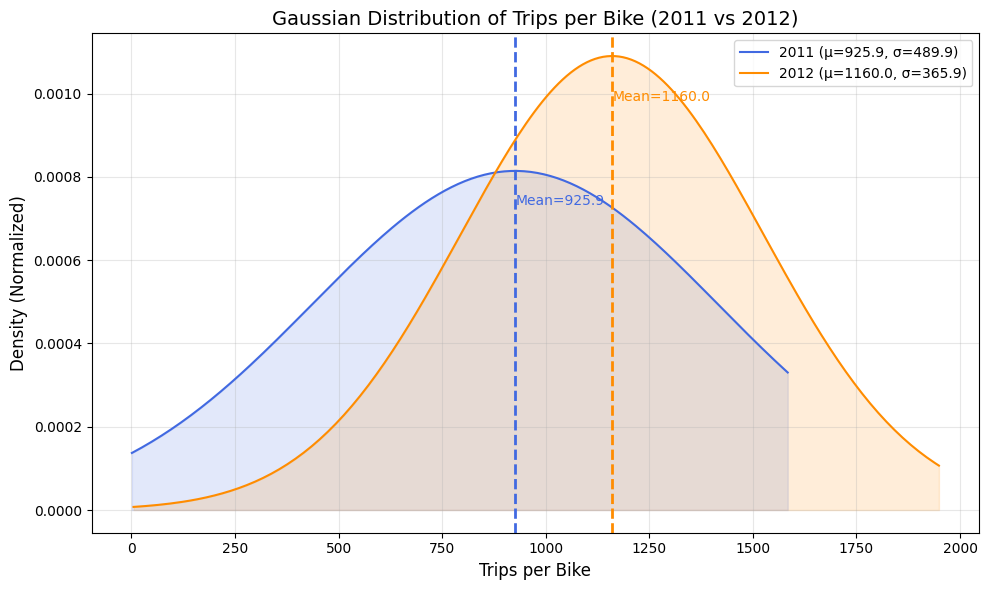

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
trips_per_bike = (bike_data.groupby(['Year', 'Bike number']).size().reset_index(name='Trips'))
plt.figure(figsize=(10, 6))
colors = {2011: "royalblue", 2012: "darkorange"}
for year, group in trips_per_bike.groupby('Year'):
    data = group['Trips']
    mean, std = data.mean(), data.std()
    # Gaussian fit
    x = np.linspace(data.min(), data.max(), 200)
    y = norm.pdf(x, mean, std)
    # Plot Gaussian curve
    plt.plot(x, y, color=colors.get(year, 'gray'), label=f"{year} (μ={mean:.1f}, σ={std:.1f})")
    plt.fill_between(x, y, alpha=0.15, color=colors.get(year, 'gray'))
    # Add mean line
    plt.axvline(mean, color=colors.get(year, 'gray'), linestyle='--', linewidth=2)
    plt.text(mean + 2, max(y)*0.9, f"Mean={mean:.1f}", color=colors.get(year, 'gray'))
plt.title("Gaussian Distribution of Trips per Bike (2011 vs 2012)", fontsize=14)
plt.xlabel("Trips per Bike", fontsize=12)
plt.ylabel("Density (Normalized)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
yearly_summary = bike_data.groupby('Year').agg({
    'Start station number': pd.Series.nunique,
    'End station number': pd.Series.nunique,
    'Bike number': pd.Series.nunique
}).rename(columns={
    'Start station number': 'Unique Start Stations',
    'End station number': 'Unique End Stations',
    'Bike number': 'Unique Bikes'})
yearly_summary['Total Stations'] = bike_data.groupby('Year').apply(
    lambda x: pd.concat([x['Start station number'], x['End station number']]).nunique())
yearly_summary['Total Trips'] = bike_data.groupby('Year').size()
yearly_summary = yearly_summary[['Total Stations', 'Unique Bikes', 'Total Trips']]
print("Yearly Bike Share Summary (Before % Increase Calculations)\n")
print(yearly_summary.astype(int))

Yearly Bike Share Summary (Before % Increase Calculations)

      Total Stations  Unique Bikes  Total Trips
Year                                           
2011             144          1325      1226767
2012             191          1749      2028911


C:\Users\basud\AppData\Local\Temp\ipykernel_26332\792134648.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_summary['Total Stations'] = bike_data.groupby('Year').apply(


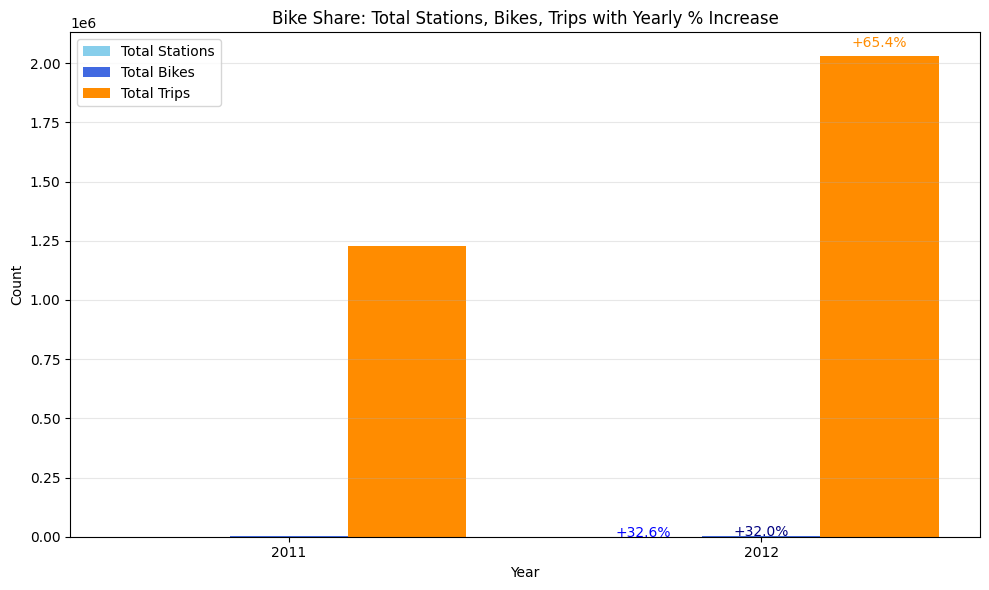

In [64]:
years = yearly_summary.index.astype(str)
total_stations = yearly_summary['Total Stations']
total_bikes = yearly_summary['Unique Bikes']
total_trips = yearly_summary['Total Trips']
# Calculate % increase on the fly
pct_station = total_stations.pct_change() * 100
pct_bike = total_bikes.pct_change() * 100
pct_trips = total_trips.pct_change() * 100
x = np.arange(len(years))
bar_width = 0.25
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bars
ax1.bar(x - bar_width, total_stations, width=bar_width, label='Total Stations', color='skyblue')
ax1.bar(x, total_bikes, width=bar_width, label='Total Bikes', color='royalblue')
ax1.bar(x + bar_width, total_trips, width=bar_width, label='Total Trips', color='darkorange')
ax1.set_xlabel("Year")
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_ylabel("Count")
ax1.grid(axis='y', alpha=0.3)
# Add % increase labels (skip first year)
for i in range(1, len(years)):
    ax1.text(x[i] - bar_width, total_stations.iloc[i] + total_stations.max()*0.02, f"+{pct_station.iloc[i]:.1f}%", 
             ha='center', color='blue', fontsize=10)
    ax1.text(x[i], total_bikes.iloc[i] + total_bikes.max()*0.02, f"+{pct_bike.iloc[i]:.1f}%", 
             ha='center', color='navy', fontsize=10)
    ax1.text(x[i] + bar_width, total_trips.iloc[i] + total_trips.max()*0.02, f"+{pct_trips.iloc[i]:.1f}%", 
             ha='center', color='darkorange', fontsize=10)
plt.title("Bike Share: Total Stations, Bikes, Trips with Yearly % Increase")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

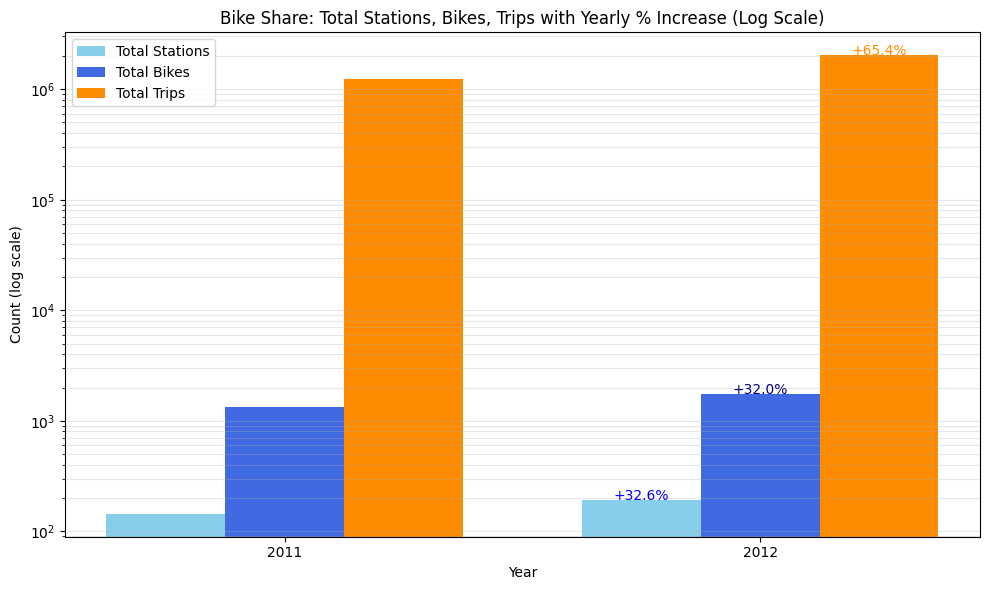

In [63]:
years = yearly_summary.index.astype(str)
total_stations = yearly_summary['Total Stations']
total_bikes = yearly_summary['Unique Bikes']
total_trips = yearly_summary['Total Trips']
# Calculate % increase on the fly
pct_station = total_stations.pct_change() * 100
pct_bike = total_bikes.pct_change() * 100
pct_trips = total_trips.pct_change() * 100
x = np.arange(len(years))
bar_width = 0.25
fig, ax1 = plt.subplots(figsize=(10, 6))
# Bars
ax1.bar(x - bar_width, total_stations, width=bar_width, label='Total Stations', color='skyblue')
ax1.bar(x, total_bikes, width=bar_width, label='Total Bikes', color='royalblue')
ax1.bar(x + bar_width, total_trips, width=bar_width, label='Total Trips', color='darkorange')
ax1.set_xlabel("Year")
ax1.set_xticks(x)
ax1.set_xticklabels(years)
ax1.set_ylabel("Count (log scale)")
ax1.set_yscale('log')  # <-- LOG SCALE
ax1.grid(axis='y', alpha=0.3, which='both')
# Add % increase labels (skip first year)
for i in range(1, len(years)):
    ax1.text(x[i] - bar_width, total_stations.iloc[i], f"+{pct_station.iloc[i]:.1f}%", 
             ha='center', color='blue', fontsize=10)
    ax1.text(x[i], total_bikes.iloc[i], f"+{pct_bike.iloc[i]:.1f}%", 
             ha='center', color='navy', fontsize=10)
    ax1.text(x[i] + bar_width, total_trips.iloc[i], f"+{pct_trips.iloc[i]:.1f}%", 
             ha='center', color='darkorange', fontsize=10)
plt.title("Bike Share: Total Stations, Bikes, Trips with Yearly % Increase (Log Scale)")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

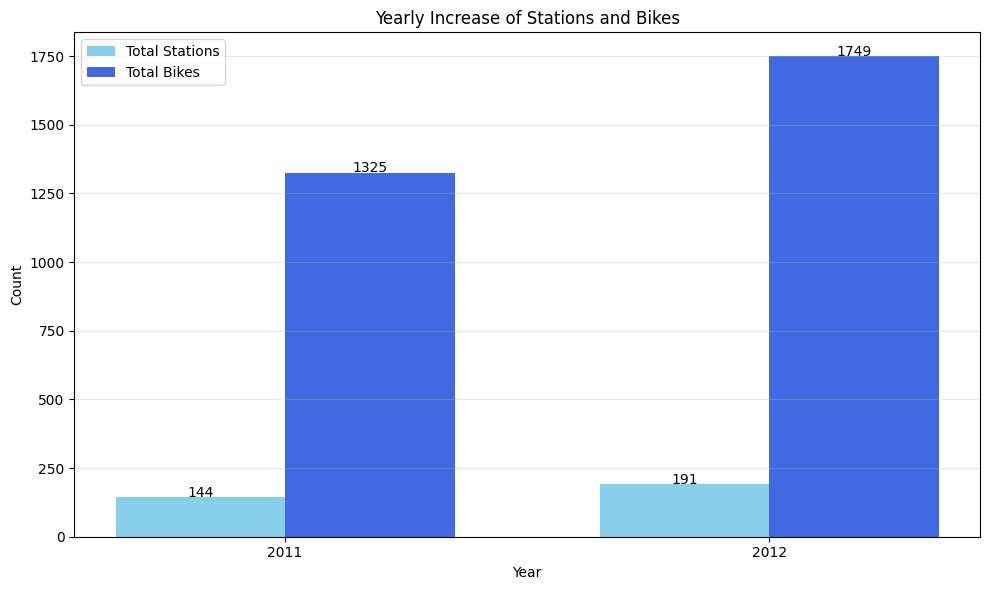

In [62]:
years = yearly_summary.index.astype(str)
total_stations = yearly_summary['Total Stations']
total_bikes = yearly_summary['Unique Bikes']
x = np.arange(len(years))
bar_width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
# Bars for stations and bikes
ax.bar(x - bar_width/2, total_stations, width=bar_width, label='Total Stations', color='skyblue')
ax.bar(x + bar_width/2, total_bikes, width=bar_width, label='Total Bikes', color='royalblue')
# Labels
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_title("Yearly Increase of Stations and Bikes")
ax.grid(axis='y', alpha=0.3)
ax.legend()
for i in range(len(years)):
    ax.text(x[i] - bar_width/2, total_stations.iloc[i] + 2, str(total_stations.iloc[i]), ha='center', fontsize=10)
    ax.text(x[i] + bar_width/2, total_bikes.iloc[i] + 2, str(total_bikes.iloc[i]), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

In [61]:
bike_data['Start date'] = pd.to_datetime(bike_data['Start date'])
bike_data['YearMonth'] = bike_data['Start date'].dt.to_period('M')
monthly_users = bike_data.groupby(['YearMonth', 'Member type']).size().unstack(fill_value=0)
monthly_users.head()

Member type,Casual,Member,Unknown
YearMonth,,,
2011-01,3065,34438,0
2011-02,6232,41326,0
2011-03,12813,50382,0
2011-04,22319,70781,0
2011-05,30996,102789,0


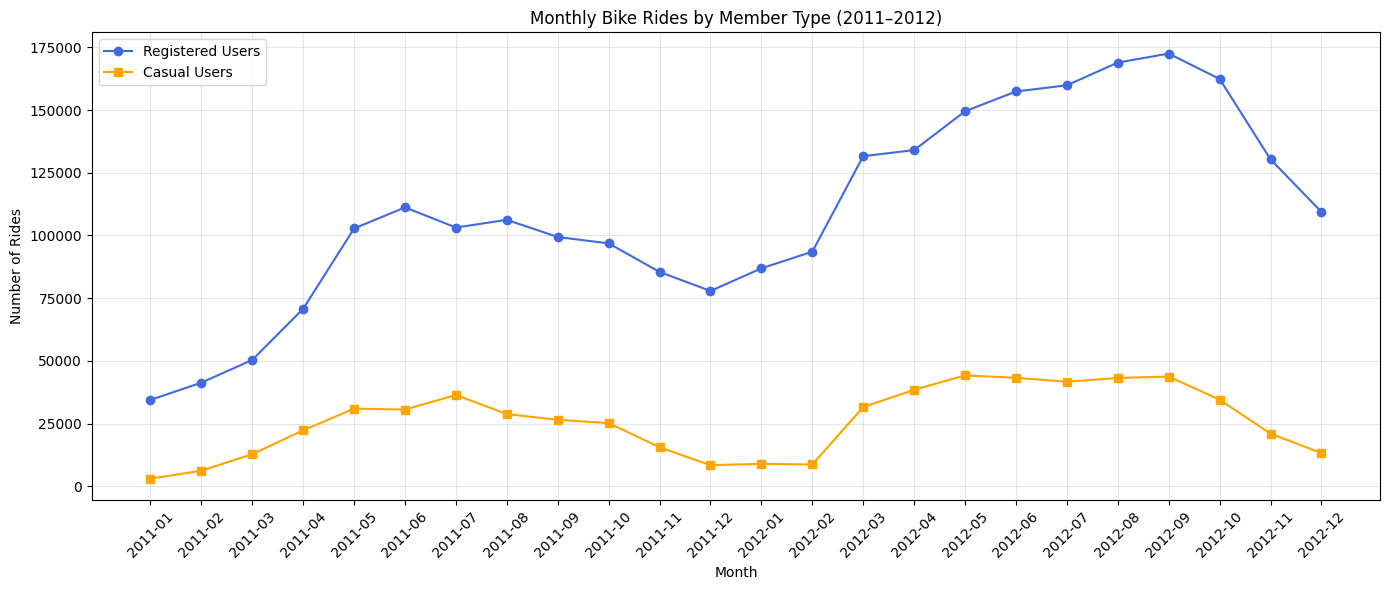

In [60]:
plt.figure(figsize=(14,6))
plt.plot(monthly_users.index.astype(str), monthly_users['Member'], label='Registered Users', color='royalblue', marker='o')
plt.plot(monthly_users.index.astype(str), monthly_users['Casual'], label='Casual Users', color='orange', marker='s')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.title("Monthly Bike Rides by Member Type (2011–2012)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [59]:
bike_data['Start date'] = pd.to_datetime(bike_data['Start date'])
bike_data['YearMonth'] = bike_data['Start date'].dt.to_period('M')
monthly_users = bike_data.groupby(['YearMonth', 'Member type']).size().unstack(fill_value=0)
monthly_duration = bike_data.groupby('YearMonth')['Duration'].sum()  # duration in original unit (seconds/minutes)

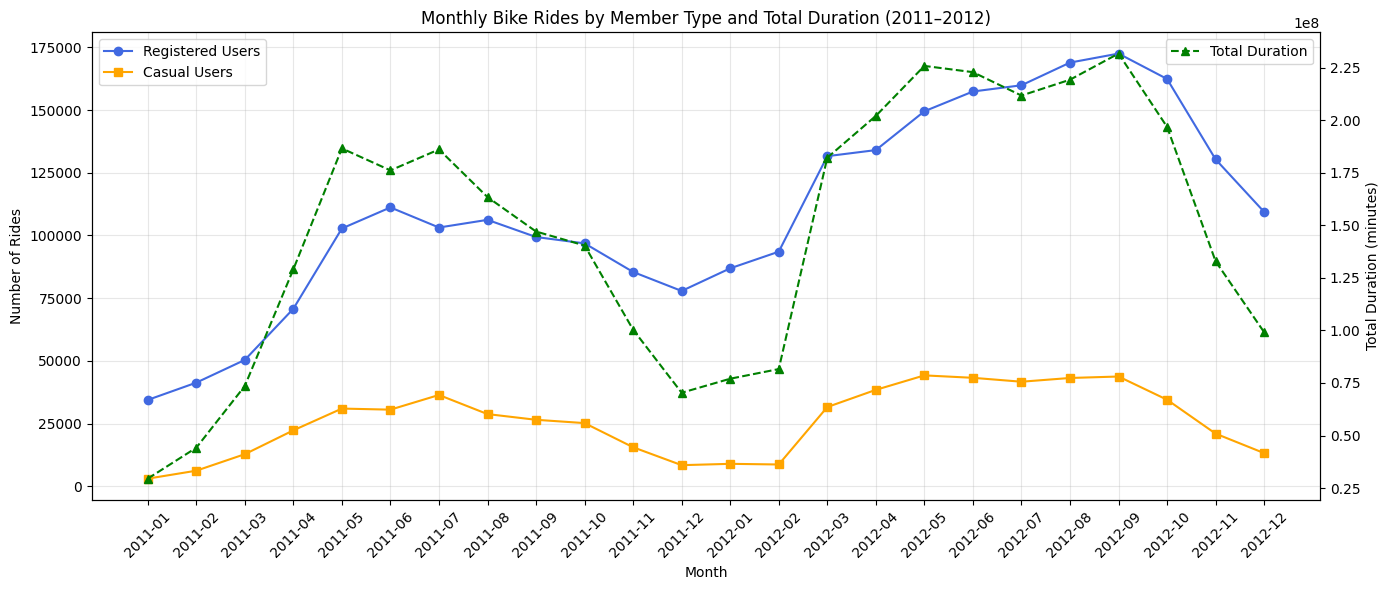

In [58]:
fig, ax1 = plt.subplots(figsize=(14,6))
# Plot Registered and Casual users
ax1.plot(monthly_users.index.astype(str), monthly_users['Member'], label='Registered Users', color='royalblue', marker='o')
ax1.plot(monthly_users.index.astype(str), monthly_users['Casual'], label='Casual Users', color='orange', marker='s')
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Rides")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(alpha=0.3)
ax1.legend(loc='upper left')
# Secondary axis for total duration
ax2 = ax1.twinx()
ax2.plot(monthly_duration.index.astype(str), monthly_duration, label='Total Duration', color='green', marker='^', linestyle='--')
ax2.set_ylabel("Total Duration (minutes)")  # adjust unit as needed
ax2.legend(loc='upper right')
plt.title("Monthly Bike Rides by Member Type and Total Duration (2011–2012)")
plt.tight_layout()
plt.show()

In [57]:
bike_data['Start date'] = pd.to_datetime(bike_data['Start date'])
bike_data['Year'] = bike_data['Start date'].dt.year
yearly_duration = bike_data.groupby(['Year', 'Member type'])['Duration'].sum().unstack(fill_value=0)
yearly_duration = yearly_duration / 3600

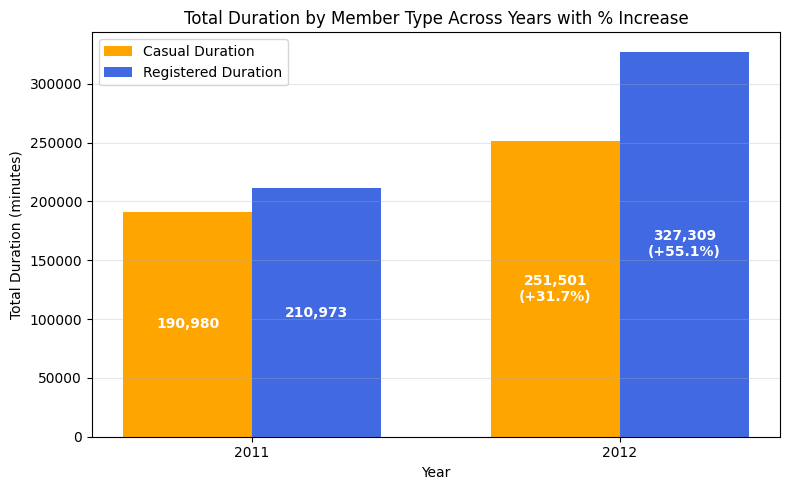

In [53]:
years = yearly_duration.index.astype(str)
x = np.arange(len(years))
bar_width = 0.35
# Calculate % increase on the fly
pct_casual = yearly_duration['Casual'].pct_change() * 100
pct_registered = yearly_duration['Member'].pct_change() * 100
fig, ax = plt.subplots(figsize=(8,5))
# Bars
ax.bar(x - bar_width/2, yearly_duration['Casual'], width=bar_width, label='Casual Duration', color='orange')
ax.bar(x + bar_width/2, yearly_duration['Member'], width=bar_width, label='Registered Duration', color='royalblue')
# Labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Total Duration (minutes)")
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.set_title("Total Duration by Member Type Across Years with % Increase")
ax.legend()
ax.grid(axis='y', alpha=0.3)
# Show absolute values and % inside bars
for i in range(len(years)):
    casual_height = yearly_duration['Casual'].iloc[i]
    registered_height = yearly_duration['Member'].iloc[i]
    ax.text(x[i] - bar_width/2, casual_height/2,
            f"{int(casual_height):,}\n(+{pct_casual.iloc[i]:.1f}%)" if i>0 else f"{int(casual_height):,}", 
            ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    ax.text(x[i] + bar_width/2, registered_height/2,
            f"{int(registered_height):,}\n(+{pct_registered.iloc[i]:.1f}%)" if i>0 else f"{int(registered_height):,}", 
            ha='center', va='center', color='white', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()